## Time Series Forecasting for Electric Power Consumption

### Data Set Information:

**Data Link:** [Individual Household Electric Power Consumption](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

This archive contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

#### Notes:

1. `(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3)` represents the active energy consumed every minute (in watt-hour) in the household by electrical equipment not measured in sub-meterings 1, 2, and 3.

2. The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset, but for some timestamps, the measurement values are missing. A missing value is represented by the absence of a value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Attribute Information:

- **date:** Date in format dd/mm/yyyy
- **time:** Time in format hh:mm:ss
- **globalactivepower:** Household global minute-averaged active power (in kilowatt)
- **globalreactivepower:** Household global minute-averaged reactive power (in kilowatt)
- **voltage:** Minute-averaged voltage (in volt)
- **global_intensity:** Household global minute-averaged current intensity (in ampere)
- **submetering1:** Energy sub-metering No. 1 (in watt-hour of active energy). Corresponds to the kitchen, containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas-powered).
- **submetering2:** Energy sub-metering No. 2 (in watt-hour of active energy). Corresponds to the laundry room, containing a washing machine, a tumble-drier, a refrigerator, and a light.
- **submetering3:** Energy sub-metering No. 3 (in watt-hour of active energy). Corresponds to an electric water-heater and an air-conditioner.

In [1]:
import pandas as pd

df = pd.read_csv('data/household_power_consumption.txt', delimiter=';', header=0)

print(df.info())

df


C:\Users\ndira\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [2]:
df = pd.read_csv('data/household_power_consumption.txt', delimiter=';', header=0, parse_dates={'Timestamp': ['Date', 'Time']})
df.head()

C:\Users\ndira\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.set_index('Timestamp', inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Global_active_power,2075259,6534,?,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_reactive_power,2075259,896,0.000,472786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,2075259,5168,?,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,2075259,377,1.000,169406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,2075259,153,0.000,1840611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,2075259,145,0.000,1408274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,2.04928e+06,NaN,NaN,NaN,6.45845,8.43715,0,0,1,17,31


In [5]:
import pandas as pd

# Replace '?' with NaN
df.replace('?', 'Nan', inplace=True)

# check the DataFrame again
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Global_active_power,2075259,6534,Nan,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_reactive_power,2075259,896,0.000,472786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage,2075259,5168,Nan,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Global_intensity,2075259,377,1.000,169406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_1,2075259,153,0.000,1840611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_2,2075259,145,0.000,1408274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_metering_3,2.04928e+06,NaN,NaN,NaN,6.45845,8.43715,0,0,1,17,31


In [6]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
# Convert columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset, but for some timestamps, the measurement values are missing. A missing value is represented by the absence of a value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [8]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
# Fill missing values with values from the same time one day ago
# df_filled = df.fillna(df.shift(1440))  # 1440 minutes in a day (24 hours * 60 minutes)


In [10]:
# Forward Fill (ffill): Fill missing values with the most recent non-null value in the column.
df = df.fillna(method='ffill')

In [11]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.086168,1.053172,0.076,0.308,0.598,1.524,11.122
Global_reactive_power,2075259.0,0.123328,0.112514,0.000,0.048,0.100,0.194,1.390
Voltage,2075259.0,240.841608,3.235574,223.200,239.000,241.020,242.870,254.150
Global_intensity,2075259.0,4.604226,4.426775,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2075259.0,1.110995,6.115908,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2075259.0,1.287958,5.786865,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2075259.0,6.416570,8.419505,0.000,0.000,1.000,17.000,31.000


In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Notes:¶

(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt-hour) in the household by electrical equipment not measured in sub-meterings 1, 2, and 3.

In [14]:
df['ActiveEnergy'] = (df['Global_active_power'] * 1000 / 60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])

# Display the DataFrame
df['ActiveEnergy']


Timestamp
2006-12-16 17:24:00    52.266667
2006-12-16 17:25:00    72.333333
2006-12-16 17:26:00    70.566667
2006-12-16 17:27:00    71.800000
2006-12-16 17:28:00    43.100000
                         ...    
2010-11-26 20:58:00    15.766667
2010-11-26 20:59:00    15.733333
2010-11-26 21:00:00    15.633333
2010-11-26 21:01:00    15.566667
2010-11-26 21:02:00    15.533333
Name: ActiveEnergy, Length: 2075259, dtype: float64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.086168,1.053172,0.076,0.308,0.598,1.524,11.122000
Global_reactive_power,2075259.0,0.123328,0.112514,0.000,0.048,0.100,0.194,1.390000
Voltage,2075259.0,240.841608,3.235574,223.200,239.000,241.020,242.870,254.150000
Global_intensity,2075259.0,4.604226,4.426775,0.200,1.400,2.600,6.400,48.400000
Sub_metering_1,2075259.0,1.110995,6.115908,0.000,0.000,0.000,0.000,88.000000
Sub_metering_2,2075259.0,1.287958,5.786865,0.000,0.000,0.000,1.000,80.000000
Sub_metering_3,2075259.0,6.416570,8.419505,0.000,0.000,1.000,17.000,31.000000
ActiveEnergy,2075259.0,9.287283,9.545391,-2.400,3.800,5.500,10.400,124.833333


In [18]:
# Resample data to daily frequency
df_daily = df.resample('D').mean()

df_daily.isnull().sum()

Global_active_power      15
Global_reactive_power    15
Voltage                  15
Global_intensity         15
Sub_metering_1           15
Sub_metering_2           15
Sub_metering_3           15
ActiveEnergy             15
dtype: int64

In [20]:
# Forward Fill (ffill): Fill missing values with the most recent non-null value in the column.
df_daily = df_daily.fillna(method='ffill')

df_daily.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
ActiveEnergy             0
dtype: int64

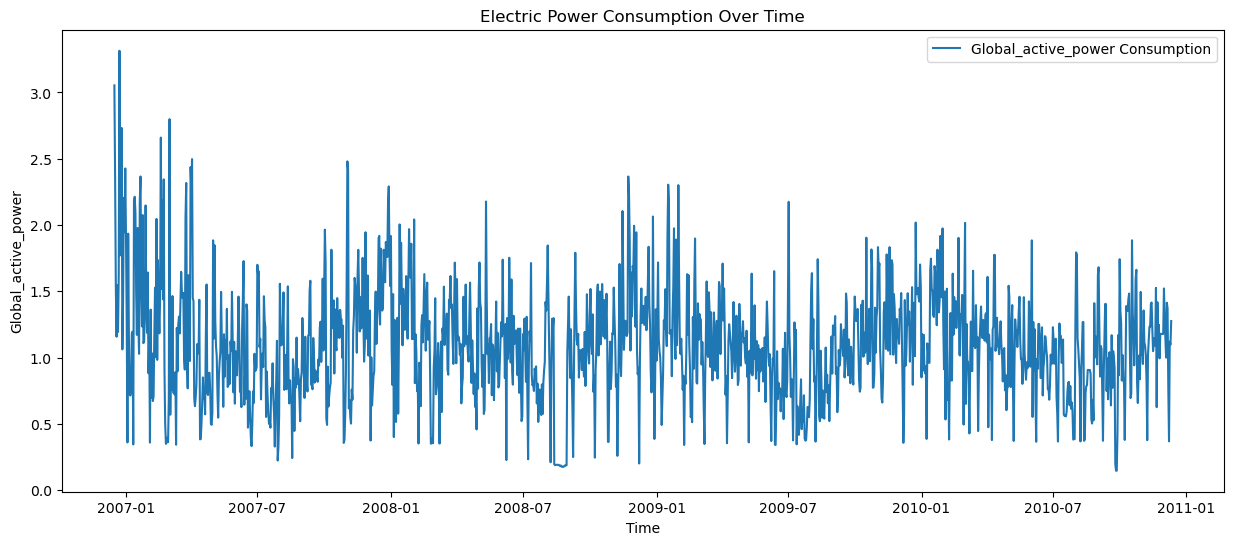

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['Global_active_power'], label='Global_active_power Consumption')
plt.title('Electric Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.legend()

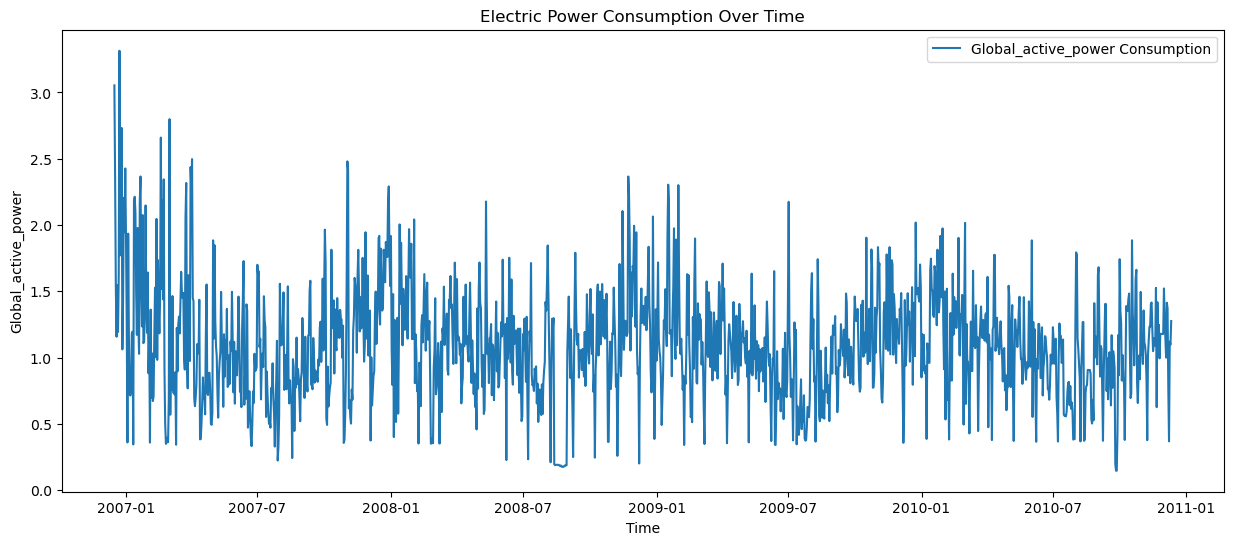

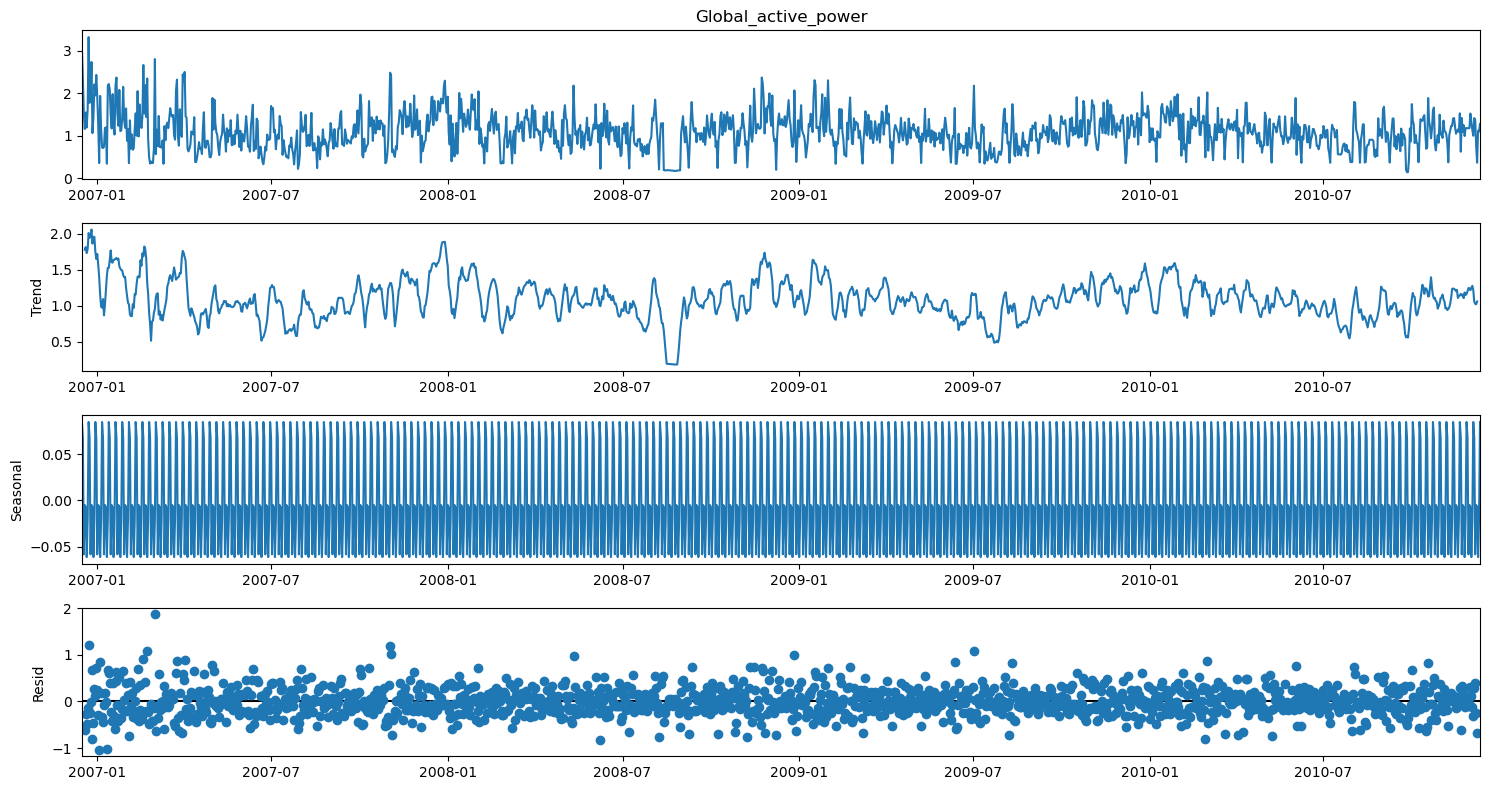

In [22]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['Global_active_power'], model='additive')
decompose_series.plot()
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -8.288289107259313
p-value: 4.330522739145552e-13
No. of lags used: 9
No. of observations used: 1447
Critical Values:
 1%: -3.4348772553489617
 5%: -2.8635394783531085
 10%: -2.5678345067434516


<ipython-input-29-13864e7a0da2>:5: RuntimeWarning: divide by zero encountered in log
  df_log= np.log(df_daily)


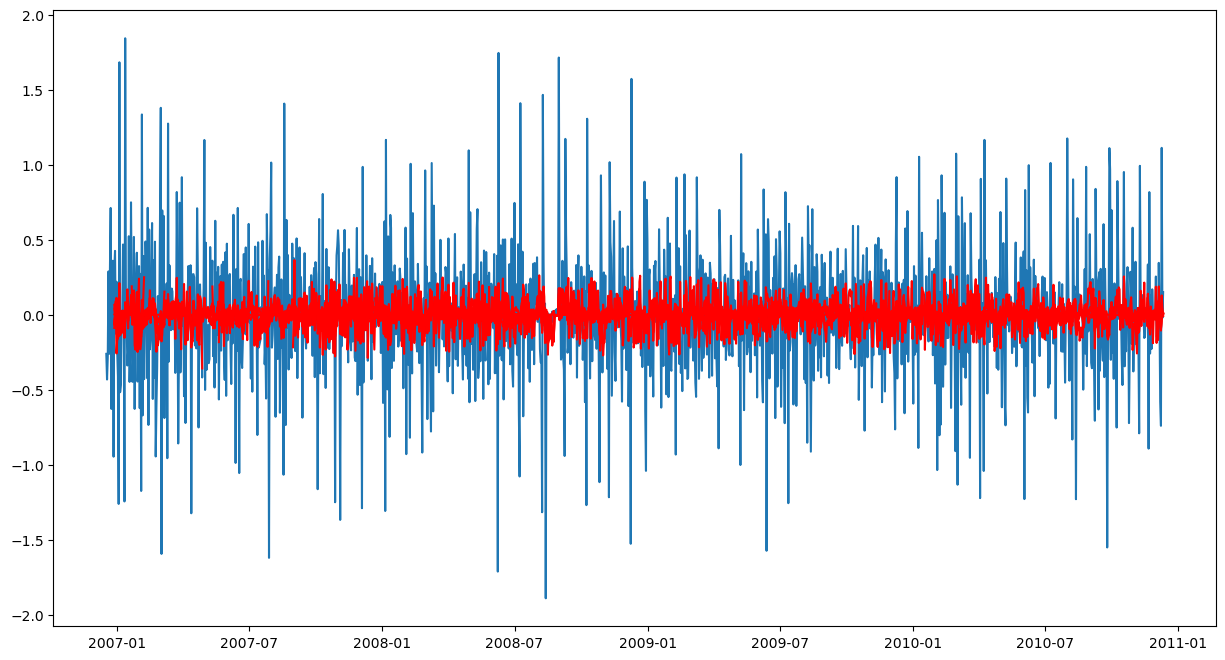

In [29]:
import numpy as np

#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log= np.log(df_daily)
df_diff=df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Global_active_power, '-')
plt.plot(df_diff.rolling(12).mean(), color='red');

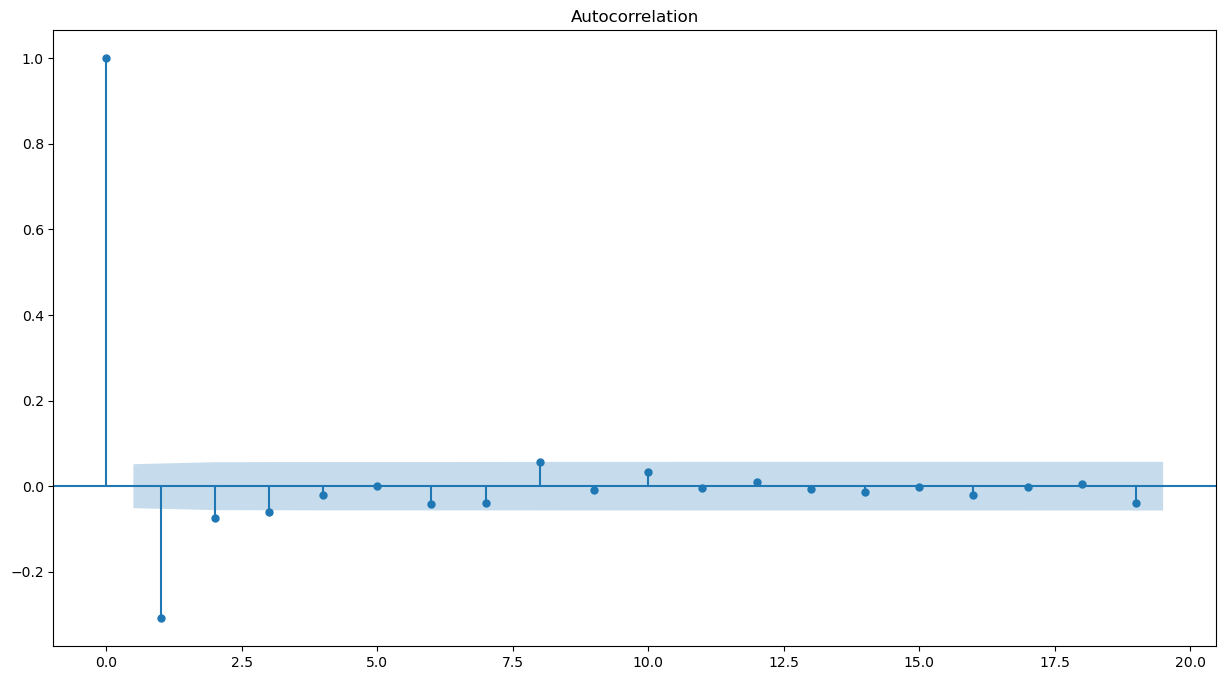

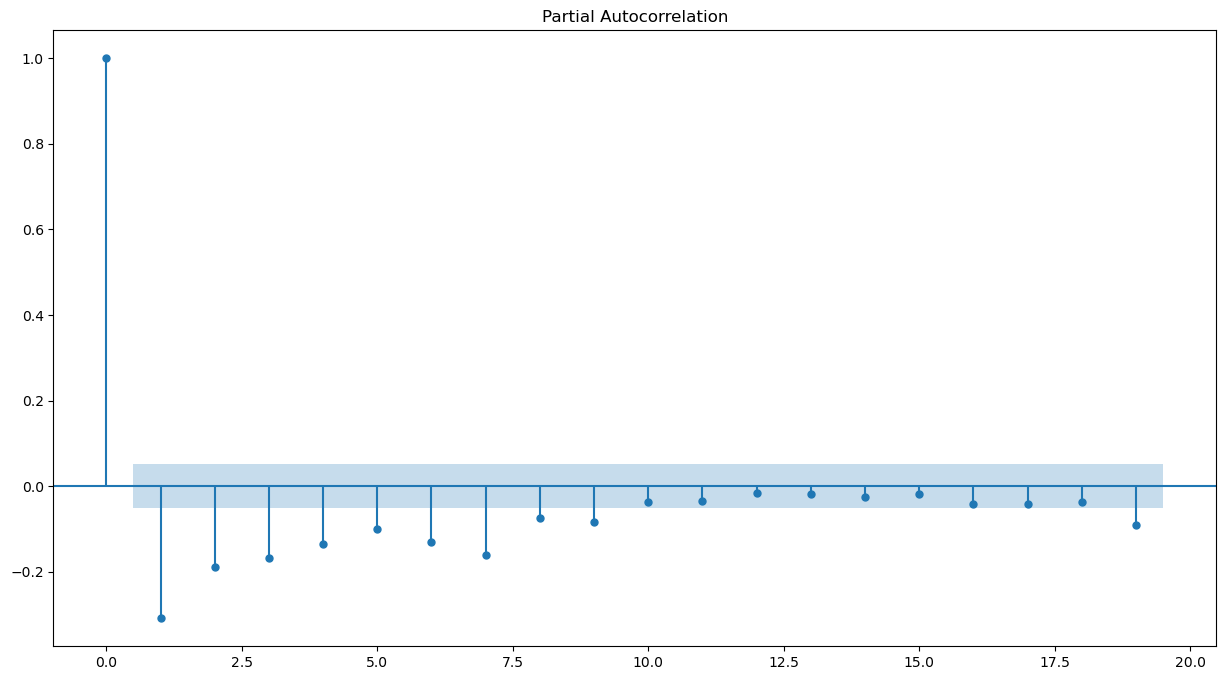

In [30]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Choose a specific column for ACF
x = df_diff['Global_active_power'].dropna()  # Drop missing values

# ACF
plot_acf(x, lags=range(0, 20))
plt.show()

# PACF
plot_pacf(x, lags=range(0, 20))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

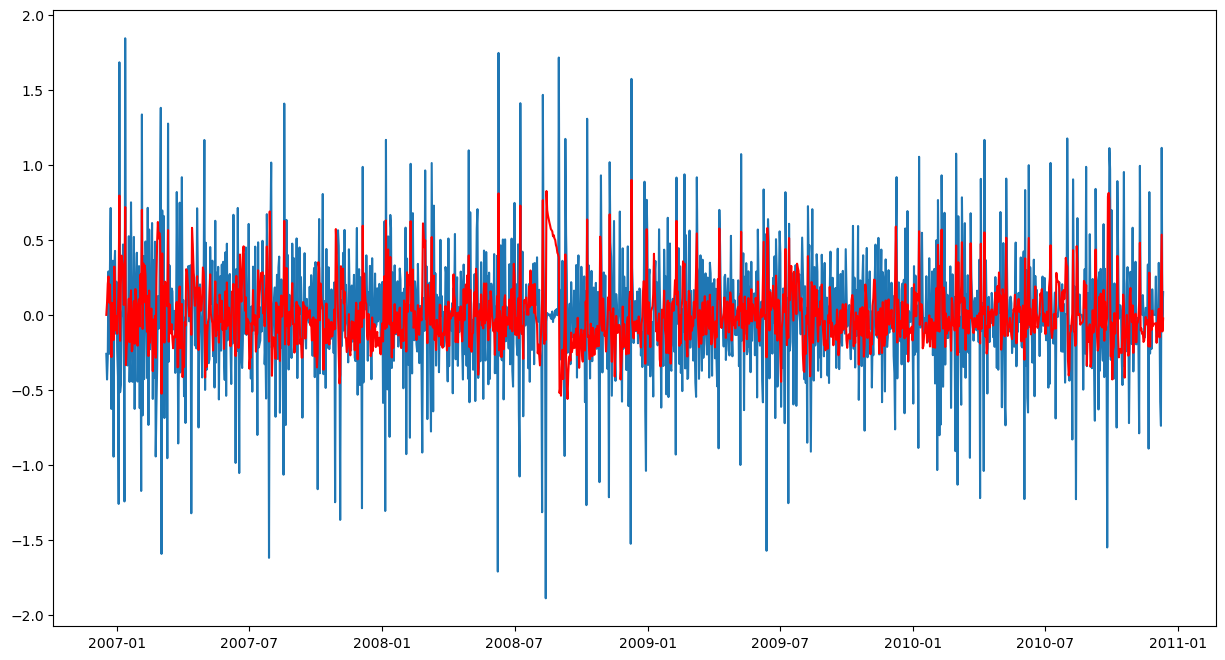

In [27]:
#The shaded regions in the plots are the confidence intervals. The lags where the PACF #and ACF charts
#cross this region are the values for p and q respectively. 

%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA

# (p,d,q)
AR_model = ARIMA(df_diff['Global_active_power'].dropna(), order=(2, 0, 1))
AR_model_results = AR_model.fit()

plt.plot(df_diff['Global_active_power'].dropna())
plt.plot(AR_model_results.fittedvalues, color='red')
plt.show

# FACEBOOK PROPHET - Univariate time series modeling 

In [31]:
!pip install prophet

In [34]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ActiveEnergy
Timestamp,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [35]:
df_daily.reset_index(inplace=True)
df_daily.head()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ActiveEnergy
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [36]:
df_prophet = df_daily.rename(columns={"Timestamp": "ds", "Global_active_power": "y"})
df_prophet.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ActiveEnergy
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,14.156111


In [37]:
# Prepare the training data
df_prophet = df_prophet[["ds", "y"]]
df_prophet.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [38]:
# Split the data into training and test sets.
# keep all rows except the last 300 for training
train_data = df_prophet[:-300]
# keep only the last 300 rows for testing
test_data = df_prophet[-300:]


In [41]:
from prophet import Prophet

# Initialize and Fit Prophet Model:
model = Prophet()
model.fit(train_data)
model

10:20:35 - cmdstanpy - INFO - Chain [1] start processing
10:20:35 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create Future DataFrame for Forecasting:

future = model.make_future_dataframe(periods=300, freq='D')  # 300 days into the future
future

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1452,2010-12-07
1453,2010-12-08
1454,2010-12-09
1455,2010-12-10


In [46]:
# Generate Forecast:

forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.230201,1.115824,2.109865,1.230201,1.230201,0.394305,0.394305,0.394305,0.114056,0.114056,0.114056,0.280249,0.280249,0.280249,0.0,0.0,0.0,1.624506
1,2006-12-17,1.229444,1.079047,2.078104,1.229444,1.229444,0.365791,0.365791,0.365791,0.079400,0.079400,0.079400,0.286391,0.286391,0.286391,0.0,0.0,0.0,1.595235
2,2006-12-18,1.228688,0.976533,1.975698,1.228688,1.228688,0.215385,0.215385,0.215385,-0.076709,-0.076709,-0.076709,0.292095,0.292095,0.292095,0.0,0.0,0.0,1.444073
3,2006-12-19,1.227931,1.034322,2.040194,1.227931,1.227931,0.300245,0.300245,0.300245,0.003054,0.003054,0.003054,0.297191,0.297191,0.297191,0.0,0.0,0.0,1.528176
4,2006-12-20,1.227175,1.025361,1.998233,1.227175,1.227175,0.280100,0.280100,0.280100,-0.021423,-0.021423,-0.021423,0.301523,0.301523,0.301523,0.0,0.0,0.0,1.507274


In [47]:
# Evaluate the Model:

# You can compare the forecasted values with the actual values in your test set.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(300)


,ds,yhat,yhat_lower,yhat_upper
1157,2010-02-15,0.927758,0.450734,1.428412
1158,2010-02-16,0.985910,0.516575,1.478658
1159,2010-02-17,0.941408,0.464711,1.504700
1160,2010-02-18,0.874840,0.397202,1.358550
1161,2010-02-19,0.900017,0.417446,1.423426
...,...,...,...,...
1452,2010-12-07,1.255779,0.749601,1.743991
1453,2010-12-08,1.234508,0.753179,1.741700
1454,2010-12-09,1.190046,0.721676,1.691361
1455,2010-12-10,1.235925,0.721669,1.706427


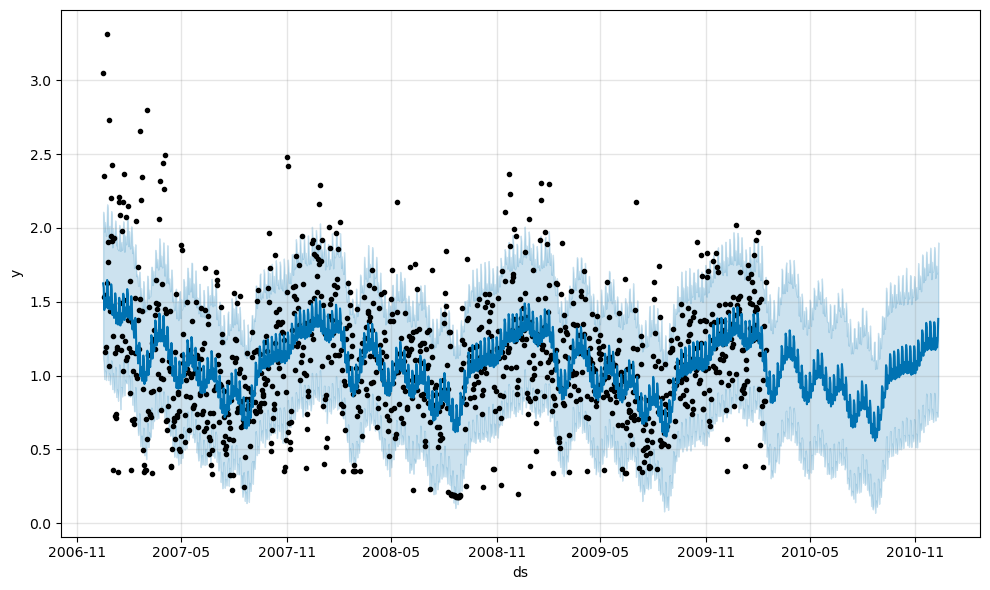

In [48]:
# Plot the forecast against the actual values:
fig1 = model.plot(forecast)


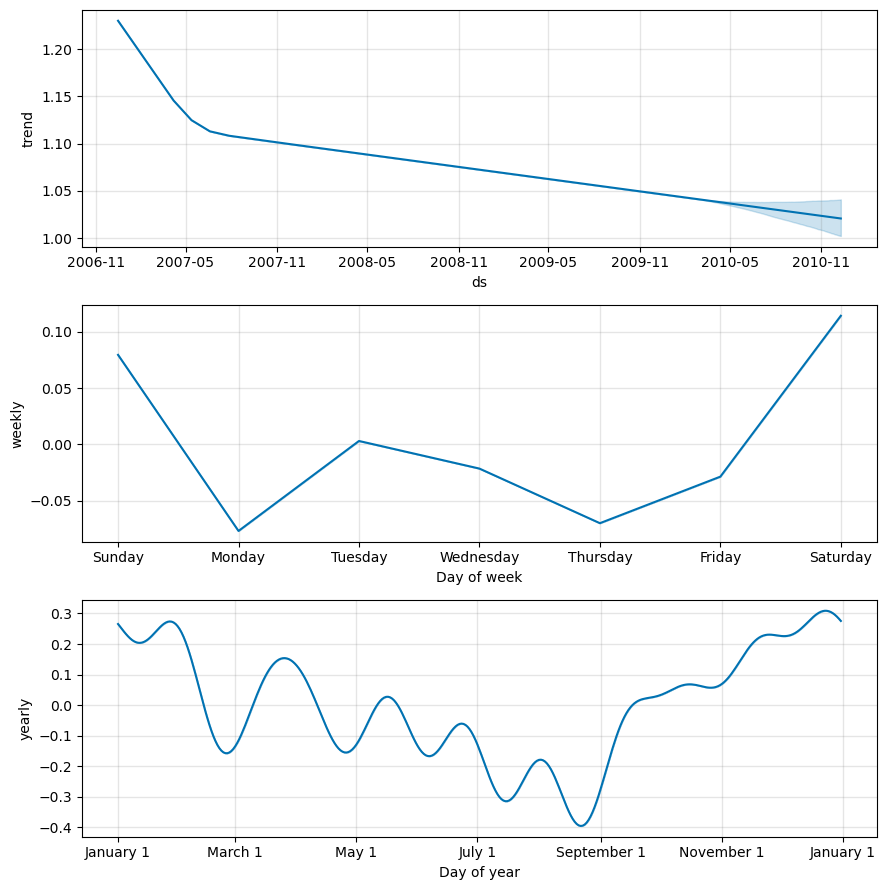

In [49]:
# Plot the components (trend, yearly, and weekly):
fig2 = model.plot_components(forecast)

In [53]:
# Evaluate Performance:

# Calculate metrics like RMSE or MAE to assess the model's performance.

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'test_data' is your DataFrame containing the actual values, and 'forecast' is the DataFrame with predictions
actual_values = test_data['y']
predicted_values = forecast.iloc[-300:]['yhat']

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 0.3409503814161021
Mean Absolute Error (MAE): 0.2541576573917379


**Root Mean Squared Error (RMSE)**: It is a measure of the average magnitude of the errors between predicted and actual values. The lower the RMSE, the better the model performance. 

In this case, an RMSE of 0.34 indicates that, on average, the predicted values deviate from the actual values by approximately 0.34 units.

**Mean Absolute Error (MAE)**: It is another measure of the average magnitude of errors, but it doesn't penalize large errors as much as RMSE does. Like RMSE, lower MAE values suggest better model performance. 

In this case, an MAE of 0.25 indicates that, on average, the absolute difference between predicted and actual values is approximately 0.25 units.

In summary, both metrics suggest that our model is performing reasonably well, with small average errors between predicted and actual values.

In [54]:
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(test_data['y'], forecast.iloc[-300:]['yhat']) / abs(test_data['y']).mean() * 100
mape


24.623743750647538

A **Mean Absolute Percentage Error (MAPE)** value of approximately 24.62% indicates that, on average, the model's predictions deviate by around 24.62% from the actual values in the test set. In other words, the model's predictions, on average, have an error of about 24.62% relative to the actual value

# FACEBOOK PROPHET - multivariate forecast model 

In [57]:
df_prophet_multi = df_daily[['Timestamp', 'Global_active_power', 'Global_reactive_power', 'Voltage',
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df_prophet_multi.columns = ['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']
df_prophet_multi.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [61]:
# Split the data into training and test sets.
# keep all rows except the last 300 for training
train_data_multi = df_prophet_multi[:-300]
# keep only the last 300 rows for testing
test_data_multi = df_prophet_multi[-300:]

train_data_multi.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [62]:
from prophet import Prophet

# Initialize and fit the model with regressors
model_multi = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
for col in ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']:
    model_multi.add_regressor(col)

model_multi.fit(train_data_multi)
model_multi

10:50:04 - cmdstanpy - INFO - Chain [1] start processing
10:50:05 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Create a DataFrame with future dates for prediction
future_multi = model_multi.make_future_dataframe(periods=300, freq='D')

# Add regressors to the future DataFrame
for col in ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']:
    future_multi[col] = df_prophet_multi[col]

future_multi.head()


,ds,add1,add2,add3,add4,add5,add6
0,2006-12-16,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [65]:

# Make predictions on the test set
forecast_multi = model.predict(future)
forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.230201,1.144306,2.115643,1.230201,1.230201,0.394305,0.394305,0.394305,0.114056,0.114056,0.114056,0.280249,0.280249,0.280249,0.0,0.0,0.0,1.624506
1,2006-12-17,1.229444,1.099427,2.104928,1.229444,1.229444,0.365791,0.365791,0.365791,0.079400,0.079400,0.079400,0.286391,0.286391,0.286391,0.0,0.0,0.0,1.595235
2,2006-12-18,1.228688,1.000449,1.965997,1.228688,1.228688,0.215385,0.215385,0.215385,-0.076709,-0.076709,-0.076709,0.292095,0.292095,0.292095,0.0,0.0,0.0,1.444073
3,2006-12-19,1.227931,1.079171,2.024624,1.227931,1.227931,0.300245,0.300245,0.300245,0.003054,0.003054,0.003054,0.297191,0.297191,0.297191,0.0,0.0,0.0,1.528176
4,2006-12-20,1.227175,1.036641,2.033601,1.227175,1.227175,0.280100,0.280100,0.280100,-0.021423,-0.021423,-0.021423,0.301523,0.301523,0.301523,0.0,0.0,0.0,1.507274


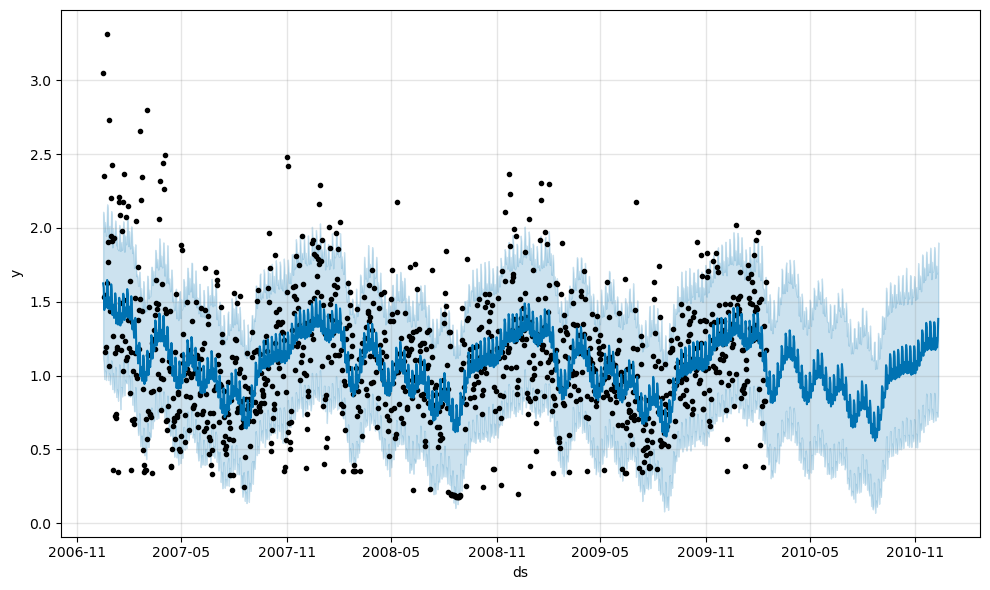

In [66]:
# Plot the forecast
fig1_multi = model.plot(forecast)


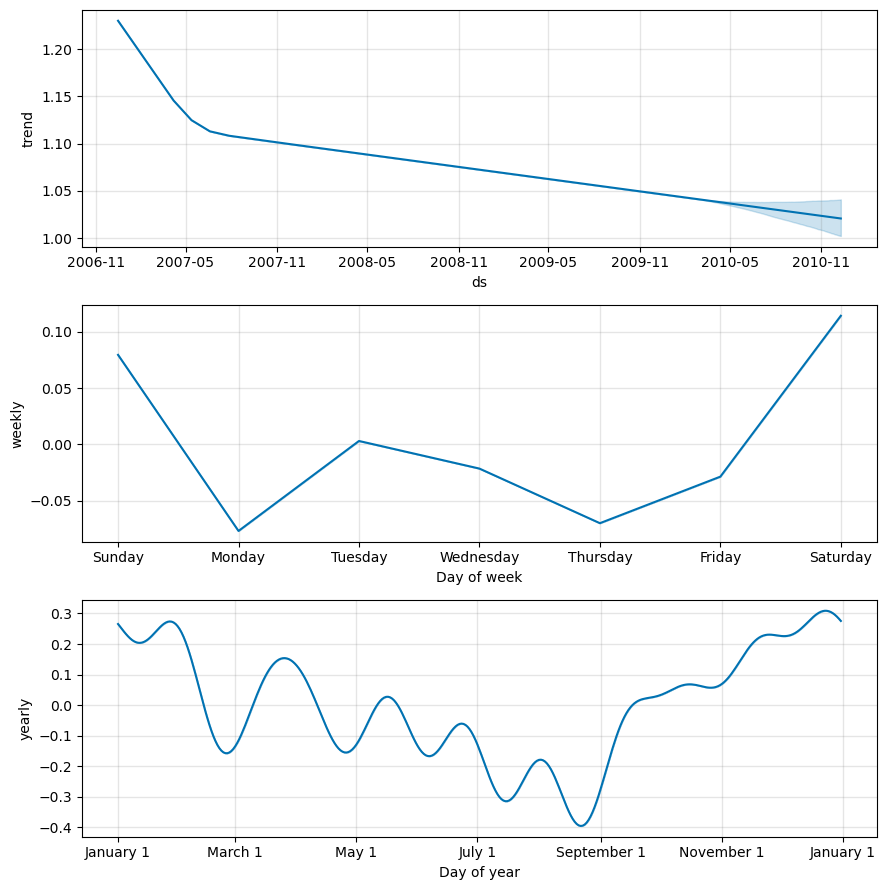

In [67]:
# Plot the components (trend, yearly, and weekly):
fig2_multi = model.plot_components(forecast)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# Assuming 'test_data' is your DataFrame containing the actual values, and 'forecast' is the DataFrame with predictions
actual_values_multi = test_data_multi['y']
predicted_values_multi = forecast_multi.iloc[-300:]['yhat']

# Evaluate Performance:
rmse_multi = sqrt(mean_squared_error(actual_values_multi, predicted_values_multi))
mae_multi = mean_absolute_error(actual_values_multi, predicted_values_multi)
mape_multi = mean_absolute_percentage_error(actual_values_multi, predicted_values_multi)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse_multi}")
print(f"Mean Absolute Error (MAE): {mae_multi}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_multi}")


Root Mean Squared Error (RMSE): 0.3409503814161021
Mean Absolute Error (MAE): 0.2541576573917379
Mean Absolute Percentage Error (MAPE): 0.3378350001672501


Here's an interpretation of the evaluation metrics:

1. **Root Mean Squared Error (RMSE):** RMSE is a measure of the average magnitude of the errors between predicted and actual values. In this case, an RMSE of 0.34 indicates that, on average, the model's predictions are off by approximately 0.34 units of the target variable.

2. **Mean Absolute Error (MAE):** MAE is another measure of the average magnitude of errors. An MAE of 0.25 suggests that, on average, the model's predictions deviate by about 0.25 units from the actual values.

3. **Mean Absolute Percentage Error (MAPE):** MAPE is a percentage-based metric, providing a relative measure of the accuracy of predictions. A MAPE of 0.34 indicates that, on average, the model's predictions are off by approximately 33.78% in percentage terms.

In summary, these metrics suggest that the model has relatively good accuracy, with predictions being reasonably close to the actual values on average. However, the interpretation should be context-specific, considering the nature of the data and the application domain. Lower values for these metrics generally indicate better model performance.

Follow me on Twitter 🐦, connect with me on LinkedIn 🔗, and check out my GitHub 🐙. You won't be disappointed!

👉 Twitter: https://twitter.com/NdiranguMuturi1  
👉 LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237  
👉 GitHub: https://github.com/Isaac-Ndirangu-Muturi-749   